In [1]:
import pandas as pd
import numpy as np

In [2]:
column_names = ['TPR','TNR','FPR','FNR','AUC','G-Mean','F1', 'G-Measure']
report = pd.DataFrame(columns = column_names)
columns = ['id',
 'Año',
 'Kilometros',
 'Combustible',
 'Mano',
 'Consumo',
 'Motor_CC',
 'Potencia',
 'Asientos',
 'Descuento',
 'Precio_cat']
columns_test = ['id',
 'Año',
 'Kilometros',
 'Combustible',
 'Mano',
 'Consumo',
 'Motor_CC',
 'Potencia',
 'Asientos',
 'Descuento']

In [3]:
import math

def cmdata_report(cm, classifier, data):# add a df as parameter
    total = cm.sum()
    TP = cm[0,0]
    FN = cm[0,1]
    FP = cm[1,0]
    TN = cm[1,1]
    TPR = TP/(TP+FN)
    TNR = TN/(TN+FP)
    FPR = FP/(FP+TN)
    FNR = FN/(FN+TP)
    ratio = (cm[0,0]+cm[1,1])/total
    PPV = TP/(TP+FP)
    AUC = (1 + TPR - FPR)/2
    GMEAN = math.sqrt(TNR*TPR)
    F1 = 2*TP/(2*TP+FP+FN)
    GMEASURE = math.sqrt(PPV*TPR)
    
    s = pd.Series([TPR,TNR,FPR,FNR,AUC,GMEAN,F1,GMEASURE], name=classifier, index=report.columns)
    df = data.append(s)
    return df

In [4]:
def get_classification_report(y_test, y_pred):
    from sklearn import metrics
    report = metrics.classification_report(y_test, y_pred, output_dict=True)
    df_classification_report = pd.DataFrame(report).transpose()
    df_classification_report = df_classification_report.sort_values(by=['f1-score'], ascending=False)
    return df_classification_report

In [5]:
train = pd.read_csv("../csv/train.csv", na_values='?')
test = pd.read_csv("../csv/test.csv", na_values='?')

train = train[columns].copy()
test = test[columns_test].copy()
print(test.shape)

(1159, 10)


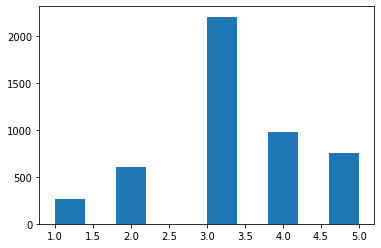

Class: 3, ocurrences: 2211 -> 45.88088815106869%
Class: 4, ocurrences: 978 -> 20.29466694334924%
Class: 5, ocurrences: 759 -> 15.750155633948951%
Class: 2, ocurrences: 602 -> 12.492218302552397%
Class: 1, ocurrences: 269 -> 5.582070969080722%


In [6]:
import matplotlib.pyplot as plt

plt.hist(train['Precio_cat'])
plt.show()

classes = train['Precio_cat'].value_counts(ascending=False)
total = classes.sum()
for i in range(classes.size):
    print("Class: "+str(classes.index[i])+", ocurrences: "+str(classes.iloc[i])+" -> "+str((classes.iloc[i]/total)*100)+"%")
    

In [7]:
cols = train.columns.tolist()
print(cols)

['id', 'Año', 'Kilometros', 'Combustible', 'Mano', 'Consumo', 'Motor_CC', 'Potencia', 'Asientos', 'Descuento', 'Precio_cat']


In [8]:
cols = train.columns.tolist()
for i in cols:
    print(i)
    print(train[i].unique())

id
[1.000e+00 2.000e+00 3.000e+00 ... 4.817e+03 4.818e+03 4.819e+03]
Año
[2012. 2016. 2013. 2017. 2009. 2014. 2011. 2015. 2008. 2010. 2018. 2006.
   nan 2019. 2005. 2007. 2003. 2004. 2001. 1998. 2002. 2000. 1999.]
Kilometros
[83000.  4800. 26000. ... 60033. 40158. 65743.]
Combustible
['Diesel' 'Petrol' nan 'CNG' 'LPG' 'Electric']
Mano
['First' 'Second' 'Third' nan 'Fourth & Above']
Consumo
['23.4 kmpl' '20.51 kmpl' '25.32 kmpl' '18.5 kmpl' '18.7 kmpl' '17.8 kmpl'
 '16.8 kmpl' '18.6 kmpl' '25.2 kmpl' '10.91 kmpl' '12.99 kmpl' '17.5 kmpl'
 '25.8 kmpl' '18.25 kmpl' '10.0 kmpl' '11.5 kmpl' '19.1 kmpl' '14.21 kmpl'
 '14.16 kmpl' '17.43 kmpl' '18.0 kmpl' '15.7 kmpl' '16.0 kmpl'
 '21.43 kmpl' '21.64 kmpl' '20.73 kmpl' '14.0 kmpl' '17.9 kmpl'
 '28.4 kmpl' '15.96 kmpl' nan '23.65 kmpl' '20.36 kmpl' '21.9 kmpl'
 '22.95 kmpl' '23.59 kmpl' '17.57 kmpl' '21.27 kmpl' '17.3 kmpl'
 '22.32 kmpl' '18.9 kmpl' '24.7 kmpl' '24.0 kmpl' '11.0 kmpl' '13.0 kmpl'
 '16.47 kmpl' '17.21 kmpl' '13.6 kmpl' '26.59 km

In [9]:
train.head()

,id,Año,Kilometros,Combustible,Mano,Consumo,Motor_CC,Potencia,Asientos,Descuento,Precio_cat
0,1.0,2012.0,83000.0,Diesel,First,23.4 kmpl,1248 CC,74 bhp,5.0,NaN,3
1,2.0,2016.0,4800.0,Petrol,First,20.51 kmpl,998 CC,67.04 bhp,5.0,NaN,3
2,3.0,2016.0,26000.0,Diesel,First,25.32 kmpl,1198 CC,77 bhp,6.0,NaN,3
3,4.0,2013.0,56127.0,Petrol,First,18.5 kmpl,1197 CC,80 bhp,5.0,NaN,3
4,5.0,2017.0,41981.0,Petrol,First,18.7 kmpl,1199 CC,88.7 bhp,5.0,NaN,3


# Preprocessing data

First of all, we get all numbers from string format

In [10]:
train['Descuento'] = train['Descuento'].fillna(0)
test['Descuento'] = test['Descuento'].fillna(0)

train['Combustible'].fillna(value=train['Combustible'].value_counts().index[0],inplace =True)
train['Mano'].fillna(value=train['Mano'].value_counts().index[0],inplace =True)

In [11]:
train['Combustible'].value_counts(dropna=False)

Diesel      2618
Petrol      2151
CNG           42
LPG            7
Electric       1
Name: Combustible, dtype: int64

In [12]:
import re
import math

for index, row in train.iterrows():
    #print(row.Consumo)
    consumo = row.Consumo
    motor = row.Motor_CC
    potencia = row.Potencia
    
    if type(consumo) == str:
        train.loc[index,'Consumo'] = float(re.findall(r"^\d+\.\d+", consumo)[0])
    if type(motor) == str:
        train.loc[index,'Motor_CC'] = float(re.findall(r"^\d+", motor)[0])
    if type(potencia) == str:
        train.loc[index,'Potencia'] = float(re.findall(r"^\d+", potencia)[0])
        
for index, row in test.iterrows():
    #print(row.Consumo)
    consumo = row.Consumo
    motor = row.Motor_CC
    potencia = row.Potencia
    
    if type(consumo) == str:
        test.loc[index,'Consumo'] = float(re.findall(r"^\d+\.\d+", consumo)[0])
    if type(motor) == str:
        test.loc[index,'Motor_CC'] = float(re.findall(r"^\d+", motor)[0])
    if type(potencia) == str:
        test.loc[index,'Potencia'] = float(re.findall(r"^\d+", potencia)[0])
        
train['Consumo'] = train['Consumo'].astype(float)
train['Motor_CC'] = train['Motor_CC'].astype(float)
train['Potencia'] = train['Potencia'].astype(float)

test['Consumo'] = test['Consumo'].astype(float)
test['Motor_CC'] = test['Motor_CC'].astype(float)
test['Potencia'] = test['Potencia'].astype(float)

train.head()

,id,Año,Kilometros,Combustible,Mano,Consumo,Motor_CC,Potencia,Asientos,Descuento,Precio_cat
0,1.0,2012.0,83000.0,Diesel,First,23.40,1248.0,74.0,5.0,0.0,3
1,2.0,2016.0,4800.0,Petrol,First,20.51,998.0,67.0,5.0,0.0,3
2,3.0,2016.0,26000.0,Diesel,First,25.32,1198.0,77.0,6.0,0.0,3
3,4.0,2013.0,56127.0,Petrol,First,18.50,1197.0,80.0,5.0,0.0,3
4,5.0,2017.0,41981.0,Petrol,First,18.70,1199.0,88.0,5.0,0.0,3


In [13]:
#train.Descuento = train.Descuento.fillna(0)
#test.Descuento = test.Descuento.fillna(0)

In [14]:
from sklearn import preprocessing
le_combustible = preprocessing.LabelEncoder()
le_mano = preprocessing.LabelEncoder()

data = train.copy()
#data_without_nan = data_without_nan.dropna()
data['Combustible'] = le_combustible.fit_transform(data['Combustible'])
data['Mano'] = le_mano.fit_transform(data['Mano'])
#imputer_num = SimpleImputer(missing_values=np.NaN, strategy='mean')
#data_without_nan.Año = imputer_num.fit_transform(data_without_nan.Año.values.reshape(-1,1))[:,0]
#data_without_nan.Año = imputer_num.fit_transform(data_without_nan.Año.values.reshape(-1,1))[:,0]
cols1 = data.select_dtypes([np.number]).columns
cols2 = data.select_dtypes(exclude = [np.number]).columns
data[cols1] = data[cols1].fillna(data[cols1].mean())
data[cols2] = data[cols2].fillna(data[cols2].mode().iloc[0])

test['Combustible'] = le_combustible.fit_transform(test['Combustible'])
test['Mano'] = le_mano.fit_transform(test['Mano'])

In [15]:
data.head()

,id,Año,Kilometros,Combustible,Mano,Consumo,Motor_CC,Potencia,Asientos,Descuento,Precio_cat
0,1.0,2012.0,83000.0,1,0,23.40,1248.0,74.0,5.0,0.0,3
1,2.0,2016.0,4800.0,4,0,20.51,998.0,67.0,5.0,0.0,3
2,3.0,2016.0,26000.0,1,0,25.32,1198.0,77.0,6.0,0.0,3
3,4.0,2013.0,56127.0,4,0,18.50,1197.0,80.0,5.0,0.0,3
4,5.0,2017.0,41981.0,4,0,18.70,1199.0,88.0,5.0,0.0,3


In [16]:
cols = data.columns.tolist()
for i in cols:
    print(i)
    print(data[i].unique())

id
[1.000e+00 2.000e+00 3.000e+00 ... 4.817e+03 4.818e+03 4.819e+03]
Año
[2012.         2016.         2013.         2017.         2009.
 2014.         2011.         2015.         2008.         2010.
 2018.         2006.         2013.57109754 2019.         2005.
 2007.         2003.         2004.         2001.         1998.
 2002.         2000.         1999.        ]
Kilometros
[83000.  4800. 26000. ... 60033. 40158. 65743.]
Combustible
[1 4 0 3 2]
Mano
[0 2 3 1]
Consumo
[23.4        20.51       25.32       18.5        18.7        17.8
 16.8        18.6        25.2        10.91       12.99       17.5
 25.8        18.25       10.         11.5        19.1        14.21
 14.16       17.43       18.         15.7        16.         21.43
 21.64       20.73       14.         17.9        28.4        15.96
 18.25417615 23.65       20.36       21.9        22.95       23.59
 17.57       21.27       17.3        22.32       18.9        24.7
 24.         11.         13.         16.47       17.21     

# erase all missing data

In [17]:
#data_without_nan = data_without_nan.drop('Tipo_marchas', axis=1).drop('Nombre', axis=1).drop('id', axis=1).drop('Ciudad', axis=1)
test_id = test.id
#test = test.drop('Tipo_marchas', axis=1).drop('Nombre', axis=1).drop('id', axis=1).drop('Ciudad', axis=1)
#target = data.Precio_cat

from imblearn.over_sampling import SMOTE
oversample = SMOTE()
data, data['Precio_cat'] = oversample.fit_resample(data, data['Precio_cat'])

X = data.drop('Precio_cat', axis=1)
y = data['Precio_cat']

target = y

Oversampling

In [18]:
X.shape

(11055, 10)

In [19]:
y.shape

(11055,)

In [20]:
X.shape

(11055, 10)

In [21]:
y.shape

(11055,)

Now, train the model

In [22]:
import random
# get random seed parameter for classifiers
random_seed = random.randrange(2**32 - 1)
seed = random_seed
# seed used in first kaggle submission
seed = 2232527064
print("random_seed: "+str(random_seed))
from sklearn.model_selection import StratifiedKFold
cv_ = StratifiedKFold(n_splits=5, shuffle=True)
print("Actual seed: "+str(seed))

random_seed: 938074848
Actual seed: 2232527064


In [23]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

#model = RandomForestClassifier(random_state=random_seed)
model = XGBClassifier()
#model.fit(X, y)
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(model, X, y, cv=cv_, n_jobs=-1)

from sklearn.metrics import classification_report, confusion_matrix
rf_cmatrix = confusion_matrix(y, y_pred)
rf_report = get_classification_report(y, y_pred)
report = cmdata_report(rf_cmatrix, 'Random Forest', report)

In [24]:
cols = X.columns.tolist()
for i in cols:
    print(i)
    print(X[i].unique())

id
[1.00000000e+00 2.00000000e+00 3.00000000e+00 ... 1.17027808e+03
 4.36962097e+03 4.03625817e+03]
Año
[2012.         2016.         2013.         ... 2014.70697509 2016.83448542
 2014.43187502]
Kilometros
[83000.          4800.         26000.         ... 23804.64684893
 53886.09615647 20447.4331117 ]
Combustible
[1 4 0 3 2]
Mano
[0 2 3 1]
Consumo
[23.4        20.51       25.32       ... 13.50015658 18.28229273
 16.62892104]
Motor_CC
[1248.          998.         1198.         ... 2153.46313322 2022.8340991
 2261.9450035 ]
Potencia
[ 74.          67.          77.         ... 173.29302491 166.36034234
 142.80241033]
Asientos
[5.         6.         7.         ... 4.05237727 5.47131673 5.38870916]
Descuento
[ 0.         53.14        8.36       ...  6.61021714 60.61702112
  4.07561556]


In [25]:
report

,TPR,TNR,FPR,FNR,AUC,G-Mean,F1,G-Measure
Random Forest,0.957175,0.957341,0.042659,0.042825,0.957258,0.957258,0.958923,0.958924


In [26]:
rf_report

,precision,recall,f1-score,support
5,0.951699,0.962460,0.957050,2211.000000
1,0.953267,0.950249,0.951755,2211.000000
accuracy,0.901131,0.901131,0.901131,0.901131
weighted avg,0.901104,0.901131,0.901102,11055.000000
macro avg,0.901104,0.901131,0.901102,11055.000000
4,0.886353,0.878336,0.882326,2211.000000
2,0.879672,0.872908,0.876277,2211.000000
3,0.834529,0.841701,0.838100,2211.000000


And get the prediction

In [27]:
target.head()

0    3
1    3
2    3
3    3
4    3
Name: Precio_cat, dtype: int64

In [28]:
model.fit(X, target)
prediction = model.predict(test)

/home/roronoasins/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:51:00] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [29]:
prediction

array([5, 2, 2, ..., 3, 5, 5])

In [30]:
test_id

0       4820
1       4821
2       4822
3       4823
4       4824
        ... 
1154    5974
1155    5975
1156    5976
1157    5977
1158    5978
Name: id, Length: 1159, dtype: int64

Get csv submission

In [31]:
submit = pd.DataFrame(columns = ['id', 'Precio_cat'])
submit['Precio_cat'] = prediction.tolist()
submit['id'] = test_id.tolist()

In [32]:
submit

,id,Precio_cat
0,4820,5
1,4821,2
2,4822,2
3,4823,3
4,4824,2
...,...,...
1154,5974,1
1155,5975,3
1156,5976,3
1157,5977,5


In [33]:
submit.to_csv('submission.csv', index=False)

In [34]:
test.columns.tolist()

['id',
 'Año',
 'Kilometros',
 'Combustible',
 'Mano',
 'Consumo',
 'Motor_CC',
 'Potencia',
 'Asientos',
 'Descuento']